These examples have been taken from the paper "The construction of D- and I-optimal designs for mixture experiments with linear constraints on the components" by R. Coetzer and L. M. Haines. 

# Example 1

In [1]:
import opti
import numpy as np
import pandas as pd
from doe.design import find_local_max_ipopt
from doe.utils import get_formula_from_string
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [48]:
problem = opti.Problem(
   inputs = opti.Parameters([opti.Continuous(f"x{i+1}", [0, 1]) for i in range(3)]),
   outputs = [opti.Continuous("y")],
   constraints = [
       opti.LinearEquality(names=["x1","x2","x3"], rhs=1),
       opti.LinearInequality(["x2"], lhs=[-1], rhs=-0.1),
       opti.LinearInequality(["x3"], lhs=[1], rhs=0.6),
       opti.LinearInequality(["x1","x2"], lhs=[5,4], rhs=3.9),
       opti.LinearInequality(["x1","x2"], lhs=[-20,5], rhs=-3)
   ]
)

d_optimal_design = find_local_max_ipopt(problem, "x1 + x2 + x3 + {x1**2} + {x2**2} + {x3**2} + {x1**3} + {x2**3} + {x3**3} + x1:x2 + x1:x3 + x2:x3 + x1:x2:x3", n_experiments=12).to_numpy().T

## Linear Model

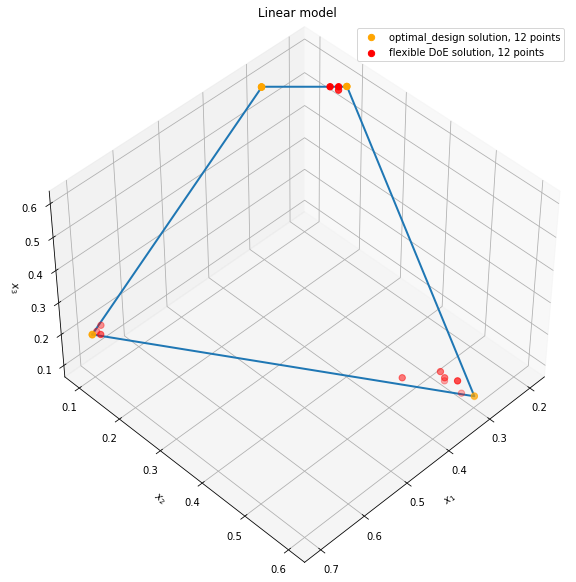

In [6]:
d_flexible_doe = np.array(
    [
        [0.21, 0.19, 0.6 ],
        [0.31, 0.57, 0.13],
        [0.32, 0.55, 0.12],
        [0.22, 0.18, 0.6 ],
        [0.69, 0.1 , 0.2 ],
        [0.21, 0.19, 0.59],
        [0.37, 0.5 , 0.13],
        [0.68, 0.1 , 0.21],
        [0.32, 0.55, 0.13],
        [0.31, 0.58, 0.1 ],
        [0.69, 0.11, 0.2 ],
        [0.32, 0.54, 0.14],
    ]
).T

d_optimal_design = np.array(
    [
        [0.29900, 0.099000, 0.601000],
        [0.19956, 0.198440, 0.601000],
        [0.30001, 0.600238, 0.098752],
        [0.70100, 0.099000, 0.199000],
        [0.30001, 0.600238, 0.098752],
        [0.70100, 0.099000, 0.199000],
        [0.19956, 0.198440, 0.601000],
        [0.70100, 0.099000, 0.199000],
        [0.19956, 0.198440, 0.601000],
        [0.30001, 0.600238, 0.098752],
        [0.70100, 0.099000, 0.199000],
        [0.30001, 0.600238, 0.098752],
    ]
).T


fig = plt.figure(figsize=((10,10)))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 45)
ax.set_title("Linear model")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.rcParams["figure.figsize"] = (10,8)

#plot feasible polytope
ax.plot(
    xs=[7/10, 3/10, 1/5, 3/10, 7/10],
    ys=[1/10, 3/5, 1/5, 1/10, 1/10],
    zs=[1/5, 1/10, 3/5, 3/5, 1/5],
    linewidth=2
)

#plot D-optimal solutions
ax.scatter(
    xs=d_optimal_design[0],
    ys=d_optimal_design[1],
    zs=d_optimal_design[2],
    marker="o",
    s=40,
    color="orange",
    label="optimal_design solution, 12 points"
)

ax.scatter(
    xs=d_flexible_doe[0],
    ys=d_flexible_doe[1],
    zs=d_flexible_doe[2],
    marker="o",
    s=40,
    color="red",
    label = "flexible DoE solution, 12 points"
)

plt.legend()

In [8]:
from doe.design import get_formula_from_string

model_formula = get_formula_from_string(problem=problem, model_type="linear")

#optimal_design
A = pd.DataFrame(d_optimal_design.T, columns=problem.inputs.names)
A = model_formula.get_model_matrix(A)
print("optimal_design:", np.sum(np.log(np.sort(np.abs(np.linalg.eigvals(A.T @ A)))[1:])))

#flexible DoE
A = pd.DataFrame(d_flexible_doe.T, columns=problem.inputs.names)
A = model_formula.get_model_matrix(A)
print("flexible DoE:", np.sum(np.log(np.sort(np.abs(np.linalg.eigvals(A.T @ A)))[1:])))

optimal_design: 2.334454242827952
flexible DoE: 1.9605756486369663


## Fully quadratic model

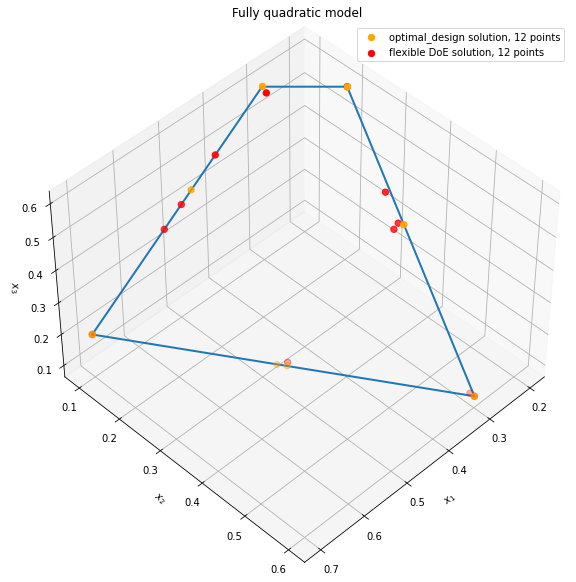

In [46]:
d_flexible_doe = np.array(
    [
        [0.3 , 0.11, 0.59],
        [0.26, 0.37, 0.37],
        [0.49, 0.35, 0.15],
        [0.25, 0.37, 0.38],
        [0.41, 0.1 , 0.49],
        [0.2 , 0.2 , 0.6 ],
        [0.53, 0.1 , 0.37],
        [0.7 , 0.1 , 0.2 ],
        [0.3 , 0.59, 0.1 ],
        [0.3 , 0.6 , 0.1 ],
        [0.49, 0.1 , 0.41],
        [0.24, 0.33, 0.43],
    ]
).T

d_optimal_design = np.array(
    [
        [0.701000, 0.099000, 0.199000],
        [0.300010, 0.600238, 0.098752],
        [0.477850, 0.099000, 0.422150],
        [0.477857, 0.099000, 0.422143],
        [0.247001, 0.388203, 0.365796],
        [0.247001, 0.388205, 0.365794],
        [0.300010, 0.600238, 0.098752],
        [0.500496, 0.349630, 0.148874],
        [0.199960, 0.200040, 0.601000],
        [0.701000, 0.099000, 0.199000],
        [0.500494, 0.349633, 0.148873],
        [0.301000, 0.099000, 0.601000],
    ]
).T


fig = plt.figure(figsize=((10,10)))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 45)
ax.set_title("Fully quadratic model")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.rcParams["figure.figsize"] = (10,8)

#plot feasible polytope
ax.plot(
    xs=[7/10, 3/10, 1/5, 3/10, 7/10],
    ys=[1/10, 3/5, 1/5, 1/10, 1/10],
    zs=[1/5, 1/10, 3/5, 3/5, 1/5],
    linewidth=2
)

#plot D-optimal solutions
ax.scatter(
    xs=d_optimal_design[0],
    ys=d_optimal_design[1],
    zs=d_optimal_design[2],
    marker="o",
    s=40,
    color="orange",
    label="optimal_design solution, 12 points"
)

ax.scatter(
    xs=d_flexible_doe[0],
    ys=d_flexible_doe[1],
    zs=d_flexible_doe[2],
    marker="o",
    s=40,
    color="red",
    label = "flexible DoE solution, 12 points"
)

plt.legend()

In [47]:
model_formula = get_formula_from_string(problem=problem, model_type="fully-quadratic")

#optimal_design
A = pd.DataFrame(d_optimal_design.T, columns=problem.inputs.names)
A = model_formula.get_model_matrix(A)
print("optimal_design:", np.sum(np.log(np.sort(np.abs(np.linalg.eigvals(A.T @ A)))[4:])))

#flexible DoE
A = pd.DataFrame(d_flexible_doe.T, columns=problem.inputs.names)
A = model_formula.get_model_matrix(A)
print("flexible DoE:", np.sum(np.log(np.sort(np.abs(np.linalg.eigvals(A.T @ A)))[4:])))

optimal_design: -11.096969605633957
flexible DoE: -11.785819822530573


## cubic model

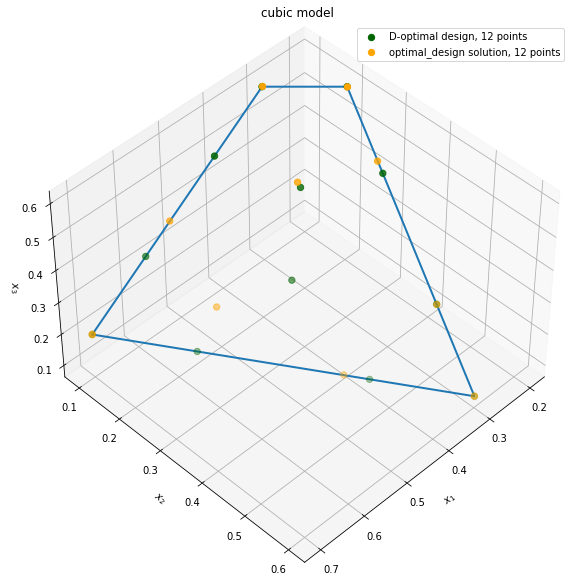

In [49]:
d_opt = np.array([
    [0.7, 0.3, 0.2, 0.3, 0.5902, 0.4098, 0.2702, 0.2279, 0.4118, 0.5738, 0.4211, 0.3360],
    [0.1, 0.6, 0.2, 0.1, 0.2373, 0.4628, 0.4808, 0.3117, 0.1, 0.1, 0.2911, 0.2264],
    [0.2, 0.1, 0.6, 0.6, 0.1725, 0.1274, 0.249, 0.4604, 0.4882, 0.3262, 0.2878, 0.4376],
])

d_optimal_design = np.array(
    [
        [0.299000, 0.100000, 0.600000],
        [0.408652, 0.464185, 0.128163],
        [0.409270, 0.100000, 0.491730],
        [0.700000, 0.100000, 0.199000],
        [0.270335, 0.481341, 0.249323],
        [0.424283, 0.287171, 0.289545],
        [0.336155, 0.227376, 0.437469],
        [0.589107, 0.238616, 0.171277],
        [0.574985, 0.100000, 0.326015],
        [0.300000, 0.600000, 0.099000],
        [0.227553, 0.310210, 0.463237],
        [0.199800, 0.199200, 0.600000],
    ]
).T


fig = plt.figure(figsize=((10,10)))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("cubic model")
ax.view_init(45, 45)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.rcParams["figure.figsize"] = (10,8)

#plot feasible polytope
ax.plot(
    xs=[7/10, 3/10, 1/5, 3/10, 7/10],
    ys=[1/10, 3/5, 1/5, 1/10, 1/10],
    zs=[1/5, 1/10, 3/5, 3/5, 1/5],
    linewidth=2
)

#plot D-optimal solution
ax.scatter(
    xs=d_opt[0],
    ys=d_opt[1],
    zs=d_opt[2],
    marker="o",
    s=40,
    color="darkgreen",
    label="D-optimal design, 12 points"
)

ax.scatter(
    xs=d_optimal_design[0],
    ys=d_optimal_design[1],
    zs=d_optimal_design[2],
    marker="o",
    s=40,
    color="orange",
    label="optimal_design solution, 12 points"
)

plt.legend()

In [51]:
f = "-1 + x1 + x2 + x3 + x1:x2 + x1:x3 + x2:x3"
for i in range(1,3):
    for j in range(i+1,4):
        f += " + {"+ f"x{i}*x{j}*(x{i}-x{j})" + "}"
for i in range(1,2):
    for j in range(i+1,3):
        for k in range(j+1,4):
            f += " + {" + f"x{i}*x{j}*x{k}" + "}"
model_formula = get_formula_from_string(problem=problem, model_type=f)

#optimal_design
A = pd.DataFrame(d_optimal_design.T, columns=problem.inputs.names)
A = model_formula.get_model_matrix(A)
print("optimal_design:", np.sum(np.log(np.sort(np.abs(np.linalg.eigvals(A.T @ A))))))

#D-optimal solution
A = pd.DataFrame(d_opt.T, columns=problem.inputs.names)
A = model_formula.get_model_matrix(A)
print("optimal solution", np.sum(np.log(np.sort(np.abs(np.linalg.eigvals(A.T @ A))))))

optimal_design: -56.22015262197378
optimal solution -54.16219521704989


# Example 2

In [56]:
problem = opti.Problem(
   inputs = opti.Parameters(
        [
            opti.Continuous("x1", domain=[.2, .65]),
            opti.Continuous("x2", domain=[.1, .55]),
            opti.Continuous("x3", domain=[.1, .2]),
            opti.Continuous("x4", domain=[.15, .35]),
        ]
    ),
   outputs = [opti.Continuous("y")],
   constraints=[opti.LinearEquality(names=["x1","x2","x3","x4"], rhs=1)]
)

d_optimal_design = find_local_max_ipopt(problem, "fully-quadratic", n_experiments=10).to_numpy()

C:\Util\Anaconda3\envs\testenv\lib\site-packages\basf_doe-0.1-py3.8.egg\doe\design.py:101: UserWarning: The minimum number of experiments is 13, but the current setting is n_experiments=10.
  warnings.warn(


In [57]:
#vertices of feasible polytope
vert = np.array(
    [
        [.65, .1, .1, .15],
        [.2, .55, .1, .15],
        [.55, .1, .2, .15],
        [.2, .45, .2, .15],
        [.45, .1, .1, .35],
        [.2, .35, .1, .35],
        [.35, .1, .2, .35],
        [.2, .25, .2, .35],
    ]
)

#D-optimal design
d_opt = np.array(
    [
        [.65, .1, .1, .15],
        [.2, .55, .1, .15],
        [.55, .1, .2, .15],
        [.2, .45, .2, .15],
        [.2, .35, .1, .35],
        [.2, .25, .2, .35],
        [.425, .325, .1, .15],
        [.406, .1, .144, .35],
        [.2, .4, .15, .25],
        [.526, .1, .1, .274],
    ]
)

d_optimal_design = np.array(
    [
        [0.65, 0.1 , 0.1 , 0.15],
        [0.2 , 0.45, 0.2 , 0.15],
        [0.43, 0.33, 0.1 , 0.15],
        [0.2 , 0.4 , 0.15, 0.25],
        [0.2 , 0.25, 0.2 , 0.35],
        [0.2 , 0.55, 0.1 , 0.15],
        [0.41, 0.1 , 0.14, 0.35],
        [0.55, 0.1 , 0.2 , 0.15],
        [0.53, 0.1 , 0.1 , 0.27],
        [0.2 , 0.35, 0.1 , 0.35],
    ]
)

d_flexible_doe = np.array(
    [
        [0.2 , 0.29, 0.2 , 0.31],
        [0.34, 0.28, 0.15, 0.23],
        [0.39, 0.1 , 0.16, 0.35],
        [0.65, 0.1 , 0.1 , 0.15],
        [0.2 , 0.35, 0.1 , 0.35],
        [0.2 , 0.45, 0.2 , 0.15],
        [0.2 , 0.55, 0.1 , 0.15],
        [0.55, 0.1 , 0.2 , 0.15],
        [0.51, 0.1 , 0.1 , 0.29],
        [0.45, 0.3 , 0.1 , 0.15],
    ]
)

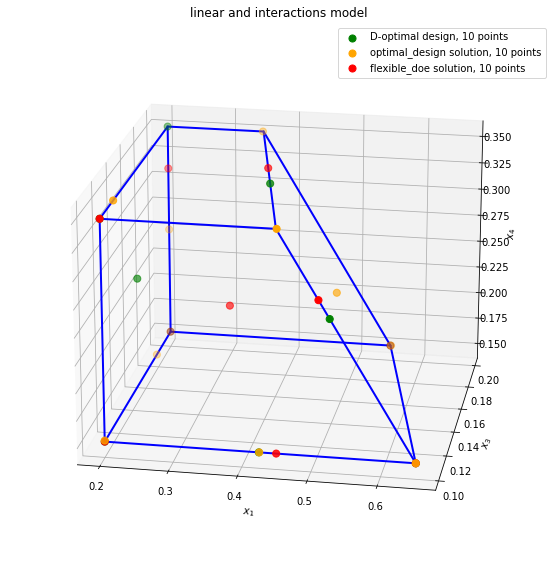

In [58]:
fig = plt.figure(figsize=((10,10)))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("linear and interactions model")
ax.view_init(20, -80)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_3$")
ax.set_zlabel("$x_4$")
plt.rcParams["figure.figsize"] = (10,8)

#plot feasible polytope
vert_proj = vert[:,[0,2,3]].T
ax.plot(
    xs=[vert_proj[0,0], vert_proj[0,1], vert_proj[0,3], vert_proj[0,2], vert_proj[0,0]],
    ys=[vert_proj[1,0], vert_proj[1,1], vert_proj[1,3], vert_proj[1,2], vert_proj[1,0]],
    zs=[vert_proj[2,0], vert_proj[2,1], vert_proj[2,3], vert_proj[2,2], vert_proj[2,0]],
    linewidth=2,
    color="blue"
)
ax.plot(
    xs=[vert_proj[0,4], vert_proj[0,5], vert_proj[0,7], vert_proj[0,6], vert_proj[0,4]],
    ys=[vert_proj[1,4], vert_proj[1,5], vert_proj[1,7], vert_proj[1,6], vert_proj[1,4]],
    zs=[vert_proj[2,4], vert_proj[2,5], vert_proj[2,7], vert_proj[2,6], vert_proj[2,4]],
    linewidth=2,
    color="blue"
)
ax.plot(
    xs=[vert_proj[0,0], vert_proj[0,4]],
    ys=[vert_proj[1,0], vert_proj[1,4]],
    zs=[vert_proj[2,0], vert_proj[2,4]],
    linewidth=2,
    color="blue"
)
ax.plot(
    xs=[vert_proj[0,1], vert_proj[0,5]],
    ys=[vert_proj[1,1], vert_proj[1,5]],
    zs=[vert_proj[2,1], vert_proj[2,5]],
    linewidth=2,
    color="blue"
)
ax.plot(
    xs=[vert_proj[0,3], vert_proj[0,7]],
    ys=[vert_proj[1,3], vert_proj[1,7]],
    zs=[vert_proj[2,3], vert_proj[2,7]],
    linewidth=2,
    color="blue"
)
ax.plot(
    xs=[vert_proj[0,2], vert_proj[0,6]],
    ys=[vert_proj[1,2], vert_proj[1,6]],
    zs=[vert_proj[2,2], vert_proj[2,6]],
    linewidth=2,
    color="blue"
)


#plot D-optimal design
d_opt_proj = d_opt[:, [0,2,3]].T
ax.scatter(
    xs=d_opt_proj[0],
    ys=d_opt_proj[1],
    zs=d_opt_proj[2],
    marker="o",
    s=50,
    color="green",
    label="D-optimal design, 10 points"
)

d_optimal_design_proj = d_optimal_design[:, [0,2,3]].T
ax.scatter(
    xs=d_optimal_design_proj[0],
    ys=d_optimal_design_proj[1],
    zs=d_optimal_design_proj[2],
    marker="o",
    s=50,
    color="orange",
    label="optimal_design solution, 10 points"
)

d_flexible_doe_proj = d_flexible_doe[:, [0,2,3]].T
ax.scatter(
    xs=d_flexible_doe_proj[0],
    ys=d_flexible_doe_proj[1],
    zs=d_flexible_doe_proj[2],
    marker="o",
    s=50,
    color="red",
    label="flexible_doe solution, 10 points"
)

plt.legend()

In [59]:
model_formula = get_formula_from_string(problem=problem, model_type="-1 + x1 + x2 + x3 + x4 + x1:x2 + x1:x3 + x1:x4 + x2:x3 + x2:x4 + x3:x4")

#optimal_design
A = pd.DataFrame(d_optimal_design, columns=problem.inputs.names)
A = model_formula.get_model_matrix(A)
print("optimal_design:", np.sum(np.log(np.sort(np.abs(np.linalg.eigvals(A.T @ A))))))

#flexible doe
A = pd.DataFrame(d_flexible_doe, columns=problem.inputs.names)
A = model_formula.get_model_matrix(A)
print("flexible DoE:", np.sum(np.log(np.sort(np.abs(np.linalg.eigvals(A.T @ A))))))

#D-optimal design
A = pd.DataFrame(d_opt, columns=problem.inputs.names)
A = model_formula.get_model_matrix(A)
print("optimal solution", np.sum(np.log(np.sort(np.abs(np.linalg.eigvals(A.T @ A))))))

optimal_design: -56.63219185181128
flexible DoE: -56.70750494498903
optimal solution -56.194828761966235
